### 단순 선형회귀

In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##### 아버지와 아들의 키 - Glaton

In [54]:
df =pd.read_csv('data/Galton.txt', sep='\t')
df.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4


- 전처리
    - 아버지와 아들의 키만 발췌
    - 컬럼명을 Father, Son으로 변경
    - 단위 변경 (1 inch --> 2.54cm)

In [55]:
# filtering
df = df[df.Gender == 'M']
df.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
4,2,75.5,66.5,M,73.5,4
5,2,75.5,66.5,M,72.5,4
8,3,75.0,64.0,M,71.0,2
10,4,75.0,64.0,M,70.5,5


In [56]:
# selection
df = df[['Father', 'Height']]

# rename
df.columns = ['Father', 'Son']
df.tail()

,Father,Son
890,68.5,72.0
891,68.5,70.5
892,68.5,68.7
893,68.5,68.5
894,68.5,67.7


In [57]:
# inches to cm
df = df * 2.54
df.tail()

,Father,Son
890,173.99,182.880
891,173.99,179.070
892,173.99,174.498
893,173.99,173.990
894,173.99,171.958


- 산점도

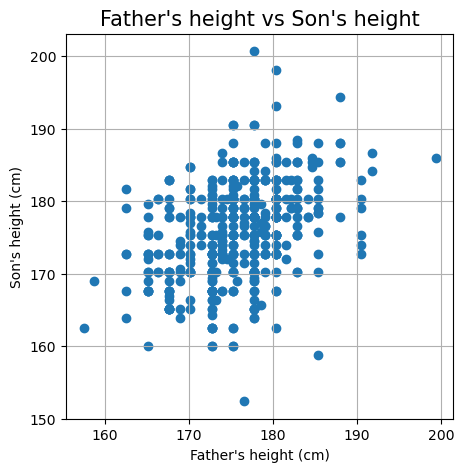

In [58]:
plt.figure(figsize=(5,5))
plt.scatter(df['Father'], df['Son'])
plt.xlabel("Father's height (cm)")
plt.ylabel("Son's height (cm)")
plt.title("Father's height vs Son's height", fontsize=15)
plt.grid()
plt.show()

- 회귀선

In [59]:
weight, bias = np.polyfit(df.Father, df.Son, deg=1)     # X, Y, degree(차수)
weight, bias

(0.4477479176030235, 97.1776370073937)

In [60]:
np.polyfit(df.Father, df.Son, deg=2)     # X, Y, degree(차수)

array([6.10561389e-04, 2.32817725e-01, 1.16071746e+02])

In [61]:
# X 축의 초소값, 최대값
df.Father.min(), df.Father.max()

(157.48, 199.39000000000001)

In [62]:
# 회귀선(직선)
xs = np.array([df.Father.min(), df.Father.max()])
ys = weight * xs + bias
ys

array([167.68897907, 186.4540943 ])

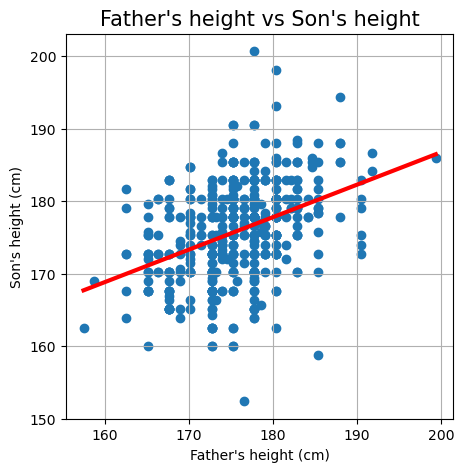

In [63]:
plt.figure(figsize=(5,5))
plt.scatter(df['Father'], df['Son'])

plt.plot(xs, ys, color='red', lw=3)

plt.xlabel("Father's height (cm)")
plt.ylabel("Son's height (cm)")
plt.title("Father's height vs Son's height", fontsize=15)
plt.grid()
plt.show()

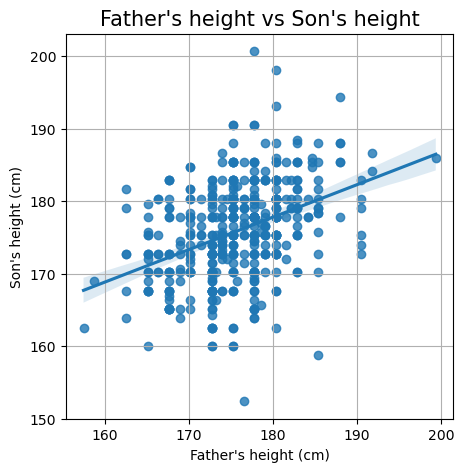

In [64]:
plt.figure(figsize=(5,5))

sns.regplot(x='Father', y='Son', data=df)

plt.xlabel("Father's height (cm)")
plt.ylabel("Son's height (cm)")
plt.title("Father's height vs Son's height", fontsize=15)
plt.grid()
plt.show()

- Scikit-Learn으로 회귀식 구하기

In [65]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [66]:
# Train
lr.fit(df[['Father']], df.Son)  # X의 값은 2차원이 되어야 함

LinearRegression()

In [67]:
X = df.Father.values.reshape(-1, 1)
y = df.Son.values
lr.fit(X, y)

LinearRegression()

In [68]:
# weight, bias
print(lr.coef_, lr.intercept_)
print(weight, bias)

[0.44774792] 97.17763700739347
0.4477479176030235 97.1776370073937


- 평가 - R squared

In [69]:
lr.score(X, y)

0.1531292747830697

In [70]:
from sklearn.metrics import r2_score
y_hat = lr.predict(X)
r2_score(y, y_hat)

0.1531292747830697

In [71]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y, y_hat)

37.75612799030966